In [2]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import nibabel as nb

In [16]:
mri_file = glob('*')[2]
mri_im = nb.load(mri_file)
mri_hdr = mri_im.header
mri_data = mri_im.get_fdata()

In [17]:
sos_file = glob('*')[3]
sos_im = nb.load(sos_file)
sos_hdr = sos_im.header
sos_data = sos_im.get_fdata()

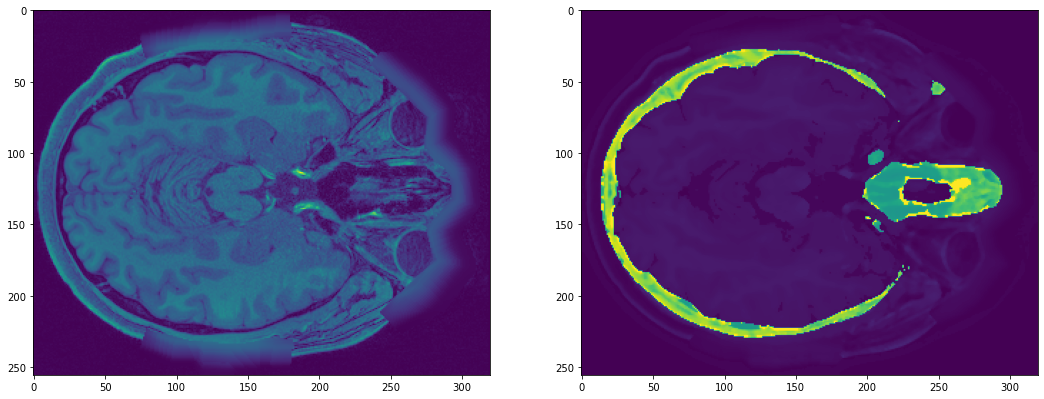

In [18]:
f = plt.subplots(1,2,figsize=(18,18))
plt.subplot(1,2,1)
plt.imshow(mri_data[:,:,120])
plt.subplot(1,2,2)
plt.imshow(sos_data[:,:,120])

In [19]:
mri_data = mri_data.flatten()
sos_data = sos_data.flatten()

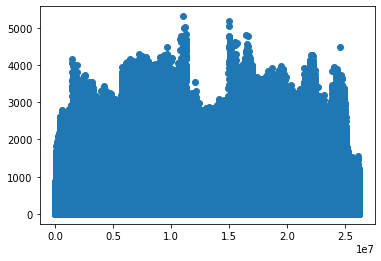

In [20]:
%%time
x = [x for x in range(len(mri_data))]
plt.scatter(x, mri_data)

Wall time: 1min 27s


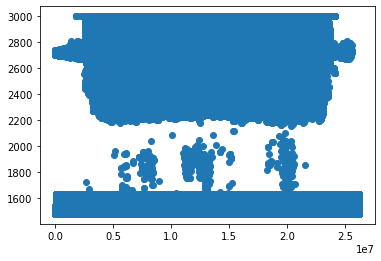

In [22]:
%%time
x = [x for x in range(len(mri_data))]
plt.scatter(x, sos_data)

Wall time: 1.83 s


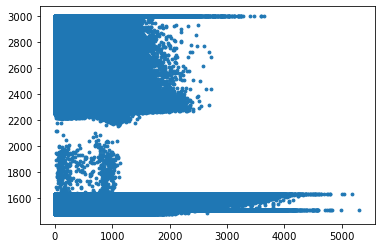

In [24]:
%%time
plt.scatter(mri_data, sos_data, s=8)

In [25]:
skull = []
for i in range(len(sos_data)):
    if sos_data[i] > 2000:
        skull.append(i)

In [30]:
print(str(len(skull)) + ' out of ' + str(len(sos_data)) + ' pixels were bone.')
print('Thats ' + str(len(skull)*100/len(sos_data)) + ' percent.')

1846826 out of 26214400 pixels were bone.
Thats 7.045082092285156 percent.


In [ ]:
soft_sos = []
soft_mri = []
for i in range(len(sos_data)):
    if i not in skull:
        soft_sos.append(sos_data[i])
        soft_mri.append(mri_data[i])